# TIME SERIES FORECAST USING ARIMA

# IMPORT LIBRARIES

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# LOAD DATA

In [85]:
df=pd.read_excel('C:/Users/ADMIN/Desktop/Data Science/Case Study/AWR Case study/Daily Service Requests.xlsx',index_col=[0],parse_dates=[0])

In [86]:
df.head()

,# of Service Requests
Date,
2018-09-01,1054
2018-09-02,1057
2018-09-03,1111
2018-09-04,951
2018-09-05,228


In [87]:
ser = df.values

In [88]:
type(ser)

numpy.ndarray

In [89]:
ser.size

30

In [90]:
df.describe()

,# of Service Requests
count,30.000000
mean,949.000000
std,459.698477
min,155.000000
25%,360.750000
50%,1103.500000
75%,1325.250000
max,1542.000000


# VISUALIZE DATA

<AxesSubplot:xlabel='Date'>

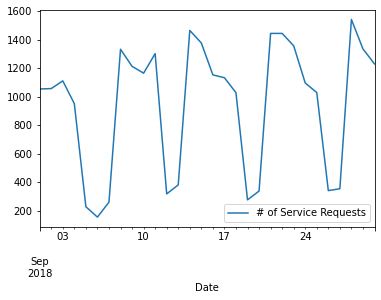

In [91]:
df.plot()

In [92]:
df_mean = df.rolling(window=10).mean()

<AxesSubplot:xlabel='Date'>

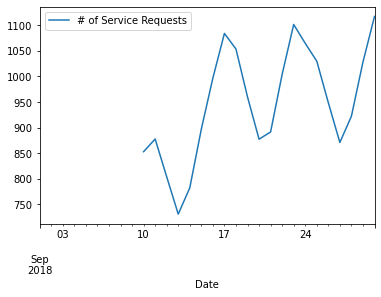

In [93]:
df_mean.plot()

In [94]:
value = pd.DataFrame(ser)

In [95]:
df1=pd.concat([value,value.shift(1)],axis=1)

In [96]:
df1.head()

,0,0
0,1054,NaN
1,1057,1054.0
2,1111,1057.0
3,951,1111.0
4,228,951.0


In [97]:
df1.columns=['Actual','Forecast']

In [98]:
df1.head()

,Actual,Forecast
0,1054,NaN
1,1057,1054.0
2,1111,1057.0
3,951,1111.0
4,228,951.0


In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
df_test = df1[1:]

In [101]:
df_test.head()

,Actual,Forecast
1,1057,1054.0
2,1111,1057.0
3,951,1111.0
4,228,951.0
5,155,228.0


In [102]:
df_err = mean_squared_error(df_test.Actual,df_test.Forecast)

In [103]:
df_err

268363.1034482759

In [104]:
np.sqrt(df_err)

518.0377432661406

# CORRELATION PLOTING

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

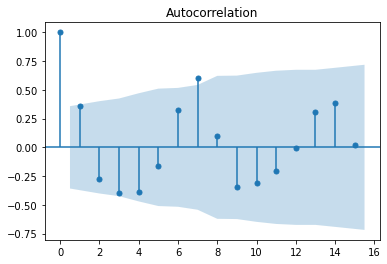

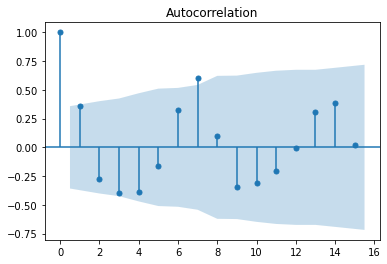

In [106]:
#to identify the value of q
plot_acf(df)
#q=1,2,3

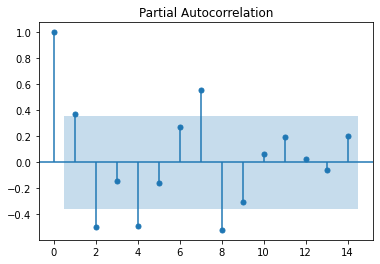

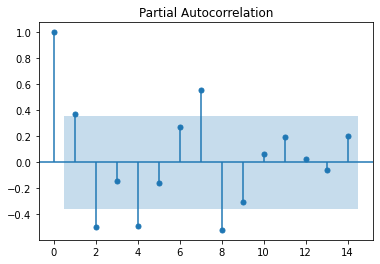

In [107]:
#to identify p value
plot_pacf(df,lags=14)
#p = 1,2,3

# TEST TRAIN SPLIT

In [109]:
# p = 1,2,3 , d = 0, q = 1,3
df_train = df[0:20]
df_test = df[20:30]

# MODEL BUILDING

In [110]:
from statsmodels.tsa.arima_model import ARIMA

In [111]:
df_model = ARIMA(df_train, order=(1,1,1))


C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

In [112]:
df_fit = df_model.fit()

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [113]:
df_fit.aic

293.25326891981064

# FUTURE 3 DAYS FORECAST

In [114]:
df_forecast = df_fit.forecast(steps=3)[0]

In [115]:
df_forecast

array([543.63635826, 638.62145984, 679.47915877])